In [120]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Problem 1

In [118]:
a = [1,2,-5]
b = [4,-5,7]

x = np.cross(a,b)

x = x/x[-1]
print("Homogenous coordinates of point of intersection: ", x[:])
print("Euclidean coordinates of point of intersection: ", x[:2])

Homogenous coordinates of point of intersection:  [0.84615385 2.07692308 1.        ]
Euclidean coordinates of point of intersection:  [0.84615385 2.07692308]


## Problem 2

In [339]:
x1= np.array([[533.4, 140.2,1], 
[1047.3, 570.0,1], 
[2033.0, 491.8,1], 
[39.7, 1639.8,1], 
[1555.2, 2021.5,1], 
[927.1, 2869.0,1], 
[557.5, 3346.8,1], 
[1991.0, 3184.6,1]])

In [340]:
x2 = np.array([[650.6, 524.9,1],
[1008.2, 795.4,1],
[1849.7, 1080.9,1],
[235.9, 1730.0,1],
[1510.1, 2012.5,1],
[933.1, 2784.9,1],
[671.7, 3169.5,1],
[1858.7, 2938.1,1]])

In [341]:
q1 = []
for i in range(0,8):
    q1.append(np.kron(x1[i],x2[i]))

In [342]:
U, S, Vh = np.linalg.svd(q1)
V = Vh.T
M = Vh[-1,:]
M = np.reshape(M, (3,3))

In [343]:
#Epipolar Line
print("Epipolar Line", M@x1[0])

I = M@x1[0]

Normalized = I/np.sqrt(I[0]**2+I[1]**2)

Epipolar Line [-0.00384054  0.00291616  2.52453287]


In [344]:
d,u = np.linalg.eig(M.T@M)

In [345]:
u

array([[-4.06698715e-03, -7.07848014e-01,  7.06353062e-01],
       [ 4.59910290e-03, -7.06364674e-01, -7.07833170e-01],
       [-9.99981154e-01, -3.69842017e-04, -6.12824190e-03]])

In [346]:
uu = u[:,2]

In [333]:
e  = uu/uu[2]
print(e)

[-115.26194199  115.50346429    1.        ]


## Problem 3

In [121]:
from skimage.filters import threshold_otsu
img = cv.imread("coins.png")

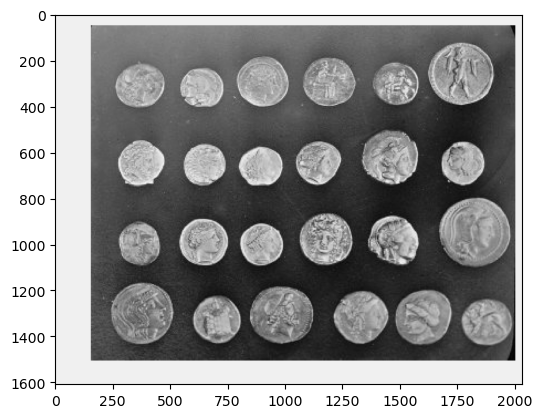

In [131]:
plt.imshow(img)
plt.show()

In [167]:
threshold_otsu(gray1)

136

In [168]:
gray1 = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret ,thresh = cv.threshold(gray1, 136,255, cv.THRESH_BINARY)


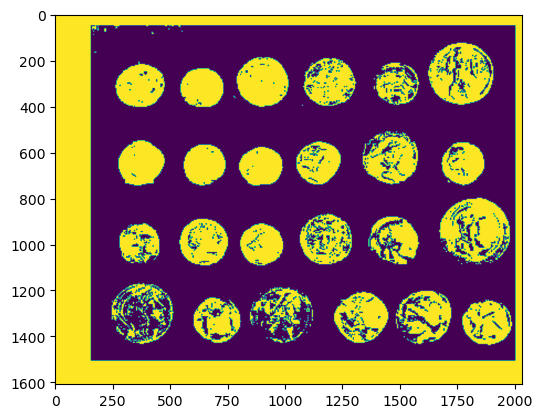

In [169]:
plt.imshow(thresh)
plt.show()

In [139]:
kernely = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
    ])
kernelx = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
    ])

x = cv.filter2D(img, -1, kernelx)
y = cv.filter2D(img, -1, kernely)


h = np.abs(x)+np.abs(y)

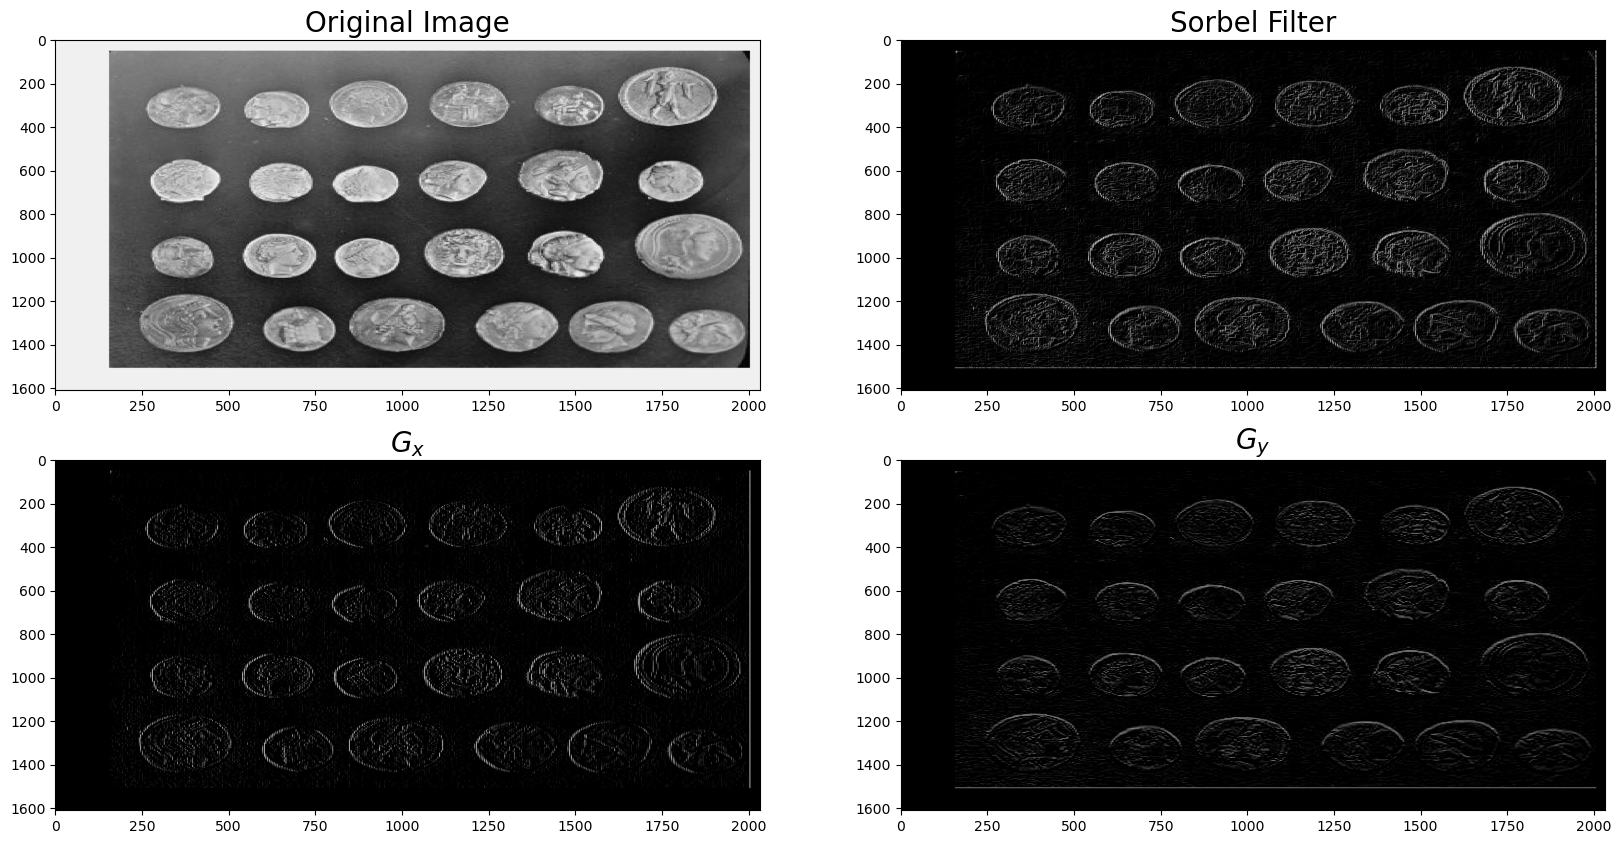

In [140]:
fig = plt.figure(figsize = (20,10))

ax = fig.add_subplot(221)
ax.imshow(img, aspect='auto')
ax.set_title('Original Image', fontsize=20)

ax = fig.add_subplot(222)
ax.imshow(h, aspect='auto')
ax.set_title('Sorbel Filter', fontsize=20)

ax = fig.add_subplot(223)
ax.imshow(x, aspect='auto')
ax.set_title('$G_x$', fontsize=20)

ax = fig.add_subplot(224)
ax.imshow(y, aspect='auto')
ax.set_title('$G_y$', fontsize=20)
plt.show()

In [259]:
from skimage.morphology import closing, square
bw = closing(thresh, square(25))

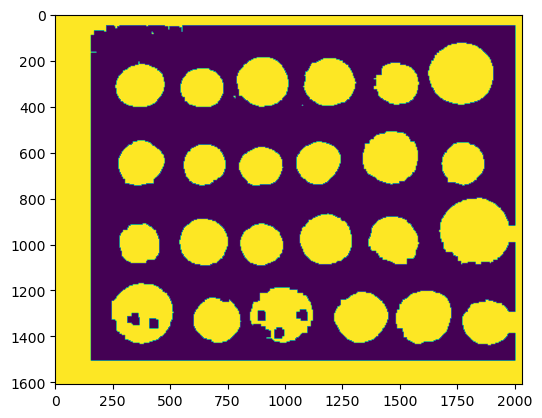

In [260]:
plt.imshow(bw)

In [261]:
from skimage.measure import label
from skimage.measure import regionprops

In [262]:
label_image = label(bw)
regions = regionprops(label_image)

In [263]:
from skimage.measure import regionprops_table

props = regionprops_table(label_image, properties=('centroid',
                                                 'orientation',
                                                 'axis_major_length',
                                                 'axis_minor_length',
                                                 'area',
                                                 'bbox'))

In [264]:
import pandas as pd
pd.DataFrame(props)

,centroid-0,centroid-1,orientation,axis_major_length,axis_minor_length,area,bbox-0,bbox-1,bbox-2,bbox-3
0,946.851199,891.135473,1.358839,3144.261924,2250.371552,684378,0,0,1609,2033
1,82.461538,424.230769,0.693127,12.352890,8.118805,65,77,421,87,430
2,259.517972,1768.665997,-1.562010,283.404654,268.571593,59733,125,1624,395,1908
3,294.771548,904.323975,1.398706,225.705168,215.536573,38148,188,791,404,1017
4,296.149793,1194.464987,-1.560479,223.643562,209.057655,36644,192,1080,399,1311
5,311.619293,370.651723,-1.334112,215.152343,186.445395,31452,207,262,404,478
6,303.054462,1489.019953,1.374715,189.387392,181.699233,26863,212,1388,395,1585
7,320.547545,640.195887,1.494904,189.553994,172.095031,25576,236,546,404,733
8,359.538462,781.769231,0.693127,12.352890,8.118805,65,356,777,366,786
9,396.500000,1077.000000,1.570796,5.656854,4.472136,20,395,1075,399,1080


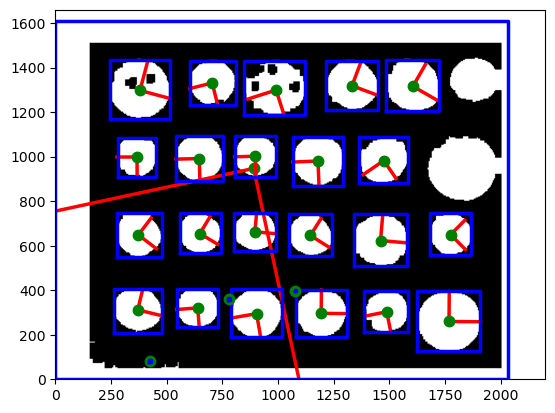

In [265]:
import math
fig, ax = plt.subplots()
ax.imshow(bw, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)
ax.axis((0, 2200, 0,1660))
plt.show()

In [241]:
## Problem 4

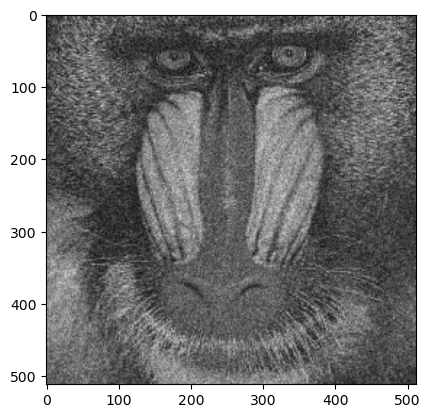

In [295]:
img2 = cv.imread("baboon.tiff")
gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
plt.imshow(gray2, cmap = 'gray')
plt.show()

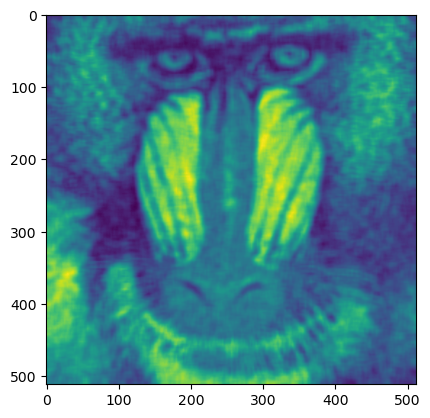

In [221]:
blur = cv.blur(gray2,(10,10)) 
plt.imshow(blur)

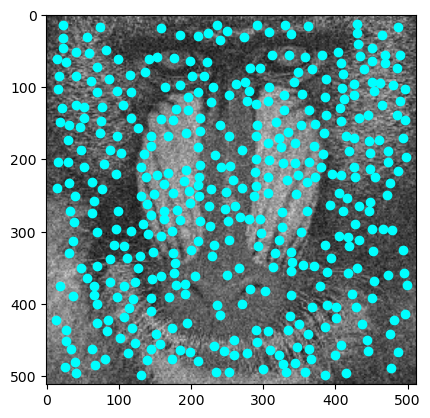

In [245]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks

coords = corner_peaks(corner_harris(gray2), min_distance=10, threshold_rel=0.02)
coords_subpix = corner_subpix(gray2, coords, window_size=50)

fig, ax = plt.subplots()
ax.imshow(gray2, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
#ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
#ax.axis((0, 821, 480, 0))
plt.show()